# Exploratory analysis of the census income data set

# read the data


read_csv has all kinds of important tuning parameters which can make the reading and the saving of the data more efficient

In [2]:
import pandas as pd 
df = pd.read_csv("adult.csv").drop('Unnamed: 0',axis=1)

In [3]:
len(df)

32561

In [4]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
target            object
dtype: object

# Explore the data

# Check how many classes do we have and if the data is  imbalanced 

In [5]:
df.target.value_counts()

<=50K    24720
>50K      7841
Name: target, dtype: int64

In [6]:
df.target.value_counts()/len(df)

<=50K    0.75919
>50K     0.24081
Name: target, dtype: float64

# View a few rows of the data

In [7]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# Some statistics for the numerical variables - if you like numbers

In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
numerical_columns = df.describe().columns
numerical_columns

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

# Some boxplots - if you like visualizations

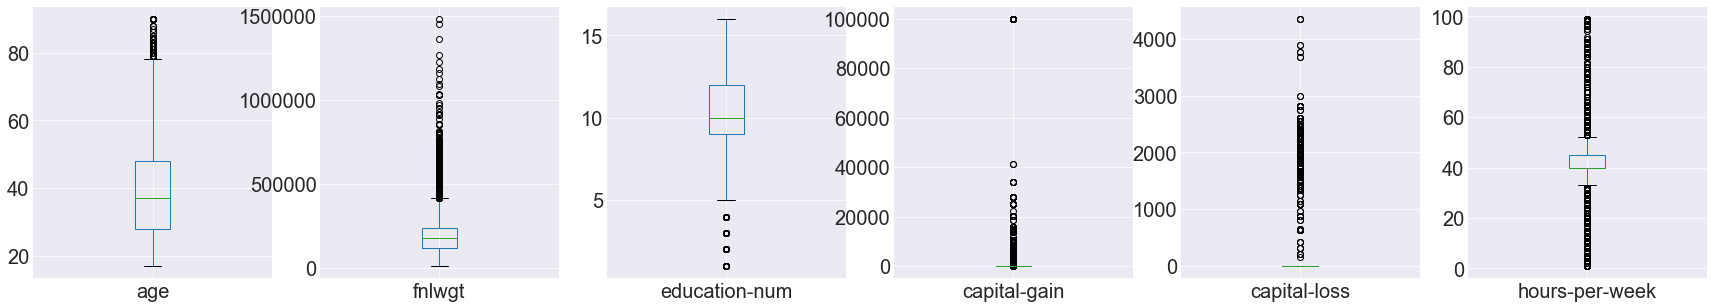

In [10]:
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot as plt
sns.set_style("darkgrid")
plt.figure(figsize=(30,5))
for i,col in enumerate(numerical_columns):
    plt.subplot(1,len(numerical_columns),i+1)
    df[[col]].boxplot(fontsize=20)
    

# View the most frequent categories for the categorical features - notice missing values (?)


In [11]:

def describe_categorical_values(df, non_interesting_columns=[], num_categories=5):
    values_df = pd.DataFrame()
    for i, column in enumerate(df.columns):
        if column in non_interesting_columns:
            continue
        top_values0 = ["{}: {}%".format(x,int(round(100*y/len(df))))
                       for x, y in zip(df[column].value_counts(dropna=False).head(num_categories).index,
                                       df[column].value_counts(dropna=False).head(num_categories).values)]
        if len(top_values0) < num_categories:
            top_values = [None]*num_categories
            top_values[:len(top_values0)] = top_values0
        else:
            top_values = top_values0
        values_df[column] = top_values
    return values_df.transpose()

describe_categorical_values(df, non_interesting_columns=numerical_columns, num_categories=6)

,0,1,2,3,4,5
workclass,Private: 70%,Self-emp-not-inc: 8%,Local-gov: 6%,?: 6%,State-gov: 4%,Self-emp-inc: 3%
education,HS-grad: 32%,Some-college: 22%,Bachelors: 16%,Masters: 5%,Assoc-voc: 4%,11th: 4%
marital-status,Married-civ-spouse: 46%,Never-married: 33%,Divorced: 14%,Separated: 3%,Widowed: 3%,Married-spouse-absent: 1%
occupation,Prof-specialty: 13%,Craft-repair: 13%,Exec-managerial: 12%,Adm-clerical: 12%,Sales: 11%,Other-service: 10%
relationship,Husband: 41%,Not-in-family: 26%,Own-child: 16%,Unmarried: 11%,Wife: 5%,Other-relative: 3%
race,White: 85%,Black: 10%,Asian-Pac-Islander: 3%,Amer-Indian-Eskimo: 1%,Other: 1%,None
sex,Male: 67%,Female: 33%,None,None,None,None
native-country,United-States: 90%,Mexico: 2%,?: 2%,Philippines: 1%,Germany: 0%,Canada: 0%
target,<=50K: 76%,>50K: 24%,None,None,None,None


# Visualize the distributions of the numerical variables per class using KDE (Kernel Density Estimation) plots

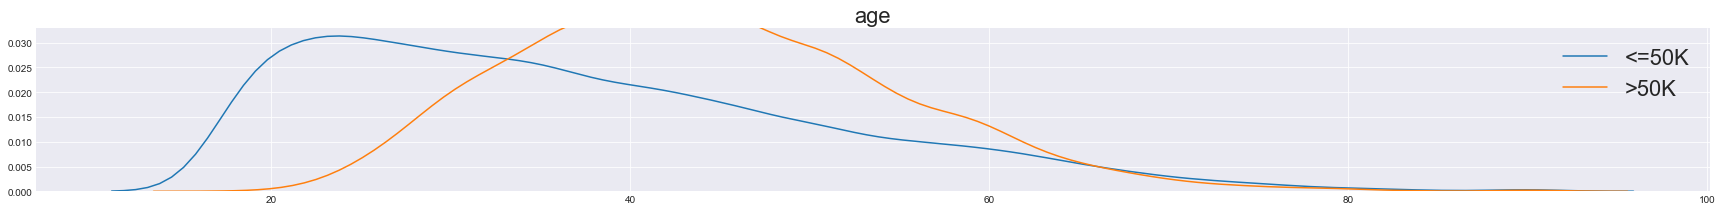

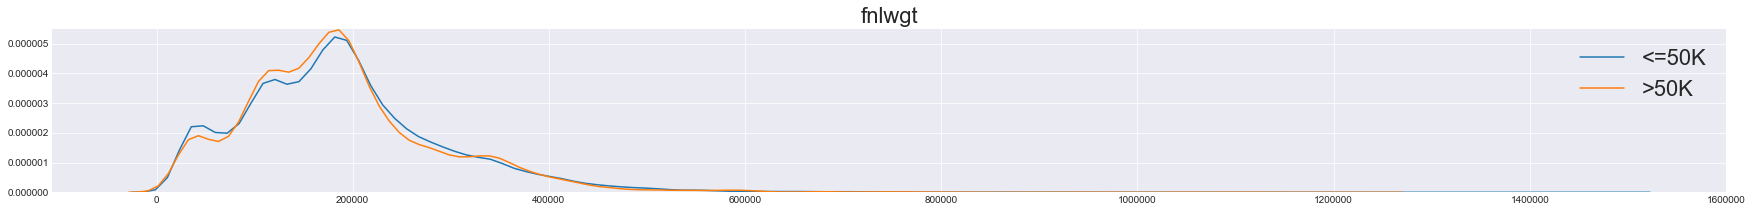

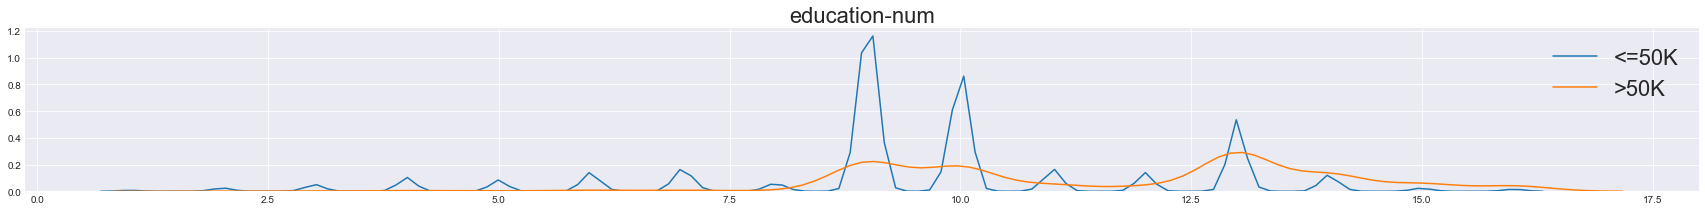

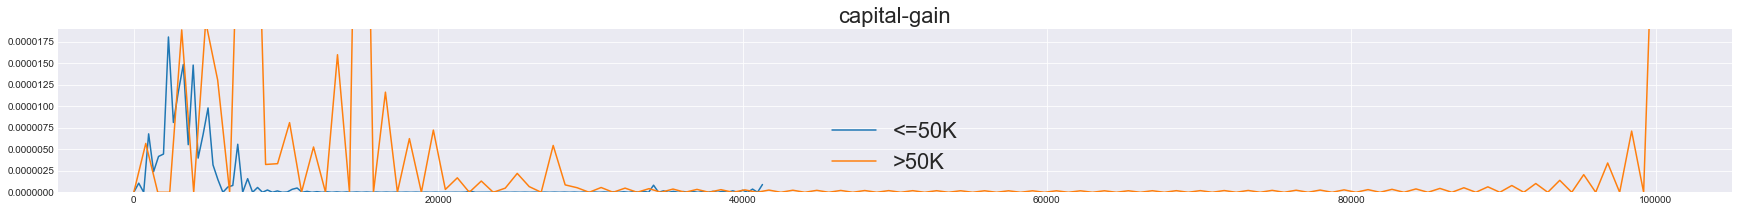

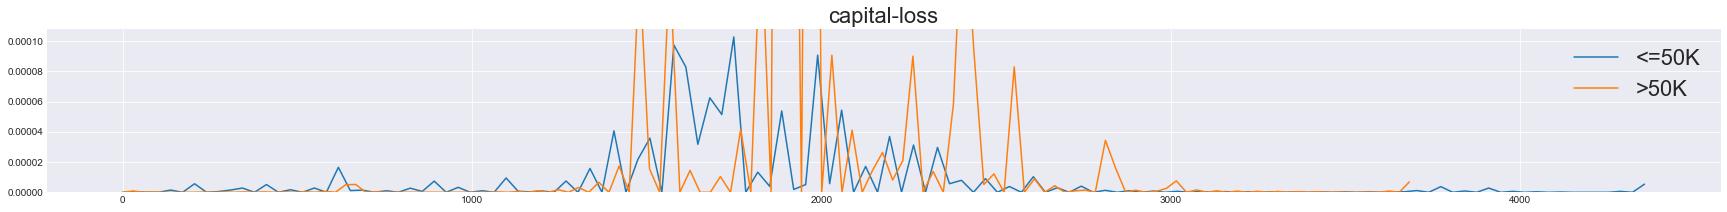

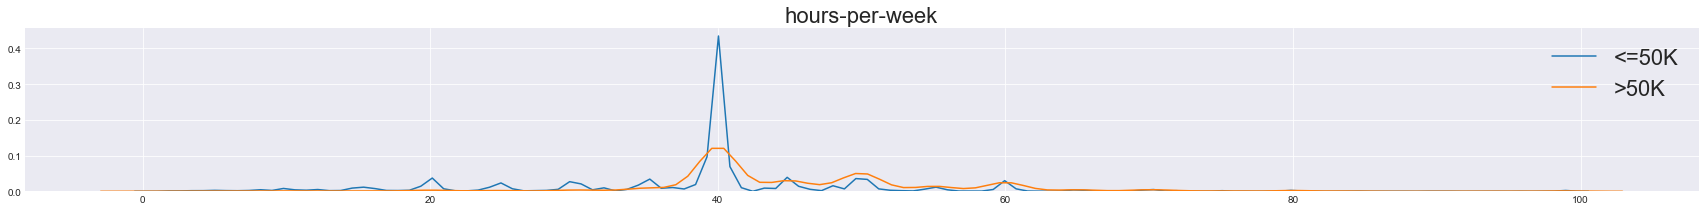

In [12]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline
for col in numerical_columns:
    plt.figure(figsize=(30,3))
    sns.kdeplot(df.loc[df.target=='<=50K',col], label='<=50K')
    sns.kdeplot(df.loc[df.target=='>50K',col], label='>50K')
    plt.legend(fontsize=22)
    plt.title(col, fontsize=22);

KDE plots doesn't always work so great, especially for integers - let's try bubble plot!

# bubble plot

In [13]:

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


def get_point(x, digits=2):
    if not isinstance(x,pd.Interval):
        a, b = x.split(',') 
        a = float(a.strip("("))
        b = float(b.strip("]"))
    else:
        a,b = x.left, x.right
    c = (a+b)/2
    return np.round(c,digits)


def bubble_plot(df, x, y, z_boolean=None, ordered_x_values=None, ordered_y_values=None, bins_x=10,
                bins_y=10, fontsize=16, figsize=(10,5), maximal_bubble_size=3500,
                normalization_by_all=False, log=False):
    """
    :param df: dataframe
    :param x:  name of first numerical/categorical field (string) (for x-axis)
    :param y: name of second numerical/categorical field (string) (for y-axis)
    :param z_boolean: name of categorical field with two categories / boolean field (for coloring)
    :param ordered_x_values: the values we would like to map from x categorical variable 
    according to the order we would like to present them
    :param ordered_y_values: the values we would like to map from the y categorical variable 
    according to the order we would like to present them
    :param bins_x: the bins for x values if x is numberic
    :param bins_y: the bins for y values if y is numberic
    :param normalization_by_all: True - shows joint distribution p(x,y), False - shows conditional distribution p(y|x)
    :param maximal_bubble_size: if the bubbles are too big or too small this is the parameter you should change!
    :param log: whether to apply log on the count (influence the size of the bubbles)
    :return: nice bubble plot, bubble size is propotional to the frequency of the bucket :)
    """
    plt.figure(figsize=figsize)
    x_is_numeric = df[x].dtype in (float, int) and ordered_x_values is None
    y_is_numeric = df[y].dtype in (float, int) and ordered_y_values is None 
    count_table = pd.concat([pd.cut(df[x], bins=bins_x) if x_is_numeric else df[x],
                             pd.cut(df[y], bins=bins_y) if y_is_numeric else df[y]], axis=1)
    count_table = count_table.groupby(x)[y].value_counts().unstack().fillna(0)
    ordered_x_values = count_table.index.values if ordered_x_values is None else ordered_x_values
    ordered_y_values = count_table.columns if ordered_y_values is None else ordered_y_values
    if z_boolean is not None:
        count_table_long, xticks, yticks, xticklabels, yticklabels = plot_with_z(df, x, y, z_boolean, bins_x, bins_y, x_is_numeric, y_is_numeric, ordered_x_values, ordered_y_values, maximal_bubble_size, 
                                                                                 normalization_by_all=normalization_by_all)
    else:
        count_table_long, xticks, yticks, xticklabels, yticklabels = plot_without_z(df, x, y, z_boolean, count_table, bins_x, bins_y, x_is_numeric, y_is_numeric, ordered_x_values, ordered_y_values, 
                                                                                    normalization_by_all=normalization_by_all, log=log, maximal_bubble_size=maximal_bubble_size )
    plt.xticks(xticks, xticklabels,fontsize=fontsize)
    plt.yticks(yticks, yticklabels,fontsize=fontsize)
    plt.xlabel(x, fontsize=fontsize)
    plt.ylabel(y, fontsize=fontsize)
    if z_boolean is None:
        plt.title("{} vs {} ".format(y,x),fontsize=fontsize+4);
    else:
        plt.title("{} vs {} and {} (in colors)".format(y,x, z_boolean),fontsize=fontsize+4);

def plot_without_z(df, x, y, z, count_table, bins_x, bins_y, x_is_numeric, y_is_numeric, ordered_x_values, ordered_y_values, normalization_by_all=False, log=False, maximal_bubble_size=4000):
    if normalization_by_all:
        count_table /= count_table.sum().sum()
    else:
        count_table = count_table.transpose()
        for col in count_table.columns:
            count_table[col] /= count_table[col].sum()
        count_table = count_table.transpose()
    if log:
        count_table = np.log(count_table)
        maximal_bubble_size /= 2
    size_factor = maximal_bubble_size/count_table.max().max()
    count_table_long = pd.melt(count_table.reset_index(), id_vars=x) 
    x_values_dict = {x:i for i, x in enumerate(ordered_x_values)} \
        if not x_is_numeric else {xx:get_point(xx) for xx in ordered_x_values}
    y_values_dict = {x:i for i, x in enumerate(ordered_y_values)} \
        if not y_is_numeric else {xx: get_point(xx) for xx in ordered_y_values}
    xticks = np.arange(count_table.shape[0]) if not x_is_numeric else [get_point(xx) for xx in ordered_x_values]
    yticks = np.arange(count_table.shape[1]) if not y_is_numeric else [get_point(xx) for xx in ordered_y_values]
    xticklabels = ordered_x_values if not x_is_numeric else [get_point(xx) for xx in ordered_x_values]
    yticklabels = ordered_y_values if not y_is_numeric else [get_point(xx) for xx in ordered_y_values]
    count_table_long[x] = count_table_long[x].map(x_values_dict)
    count_table_long[y] = count_table_long[y].map(y_values_dict) 
    plt.scatter(count_table_long[x], count_table_long[y], s=size_factor*count_table_long['value'],
                c=count_table_long['value'], cmap='cool')
 
    return count_table_long, xticks, yticks, xticklabels, yticklabels
    
def plot_with_z(df, x, y, z_boolean, bins_x, bins_y, x_is_numeric, y_is_numeric, ordered_x_values, 
                ordered_y_values, maximal_bubble_size=4000, normalization_by_all=False):
    count_table = pd.concat([pd.cut(df[x], bins=bins_x) if x_is_numeric else df[x],
                         pd.cut(df[y], bins=bins_y) if y_is_numeric else df[y], df[z_boolean]], axis=1)
    count_table = count_table.groupby([x,z_boolean])[y].value_counts().unstack().fillna(0)
    count_table = count_table.unstack().unstack()
    count_table_long = count_table.reset_index().rename(columns={0: 'value'}) #pd.melt(count_table.reset_index(), id_vars=x)
    z_boolean_values = count_table_long[z_boolean].unique()
    ratio = pd.DataFrame({'ratio':count_table_long.set_index([x,y,z_boolean]).unstack()['value'][z_boolean_values[1]] / (
    count_table_long.set_index([x,y,z_boolean]).unstack()['value'].sum(axis=1) )})
    count_table_long = count_table_long.set_index([x, y ])[['value']].merge(ratio, left_index=True, right_index=True).reset_index()
    size_factor = maximal_bubble_size/count_table_long['value'].max()
    x_values_dict = {x:i for i, x in enumerate(ordered_x_values)} \
        if not x_is_numeric else {xx:get_point(xx) for xx in ordered_x_values}
    y_values_dict = {x:i for i, x in enumerate(ordered_y_values)} \
        if not y_is_numeric else {xx: get_point(xx) for xx in ordered_y_values}
    xticks = np.arange(len(ordered_x_values)) if not x_is_numeric else [get_point(xx) for xx in ordered_x_values]
    yticks = np.arange(len(ordered_y_values)) if not y_is_numeric else [get_point(xx) for xx in ordered_y_values]
    xticklabels = ordered_x_values if not x_is_numeric else [get_point(xx) for xx in ordered_x_values]
    yticklabels = ordered_y_values if not y_is_numeric else [get_point(xx) for xx in ordered_y_values]
    count_table_long[x] = count_table_long[x].map(x_values_dict)
    count_table_long[y] = count_table_long[y].map(y_values_dict)
    plt.scatter(count_table_long[x], count_table_long[y], s=size_factor*count_table_long['value'],
                c=count_table_long['ratio'],  alpha=0.5,
                cmap='cool')
    return count_table_long, xticks, yticks, xticklabels, yticklabels


# Look at one variable vs. the target

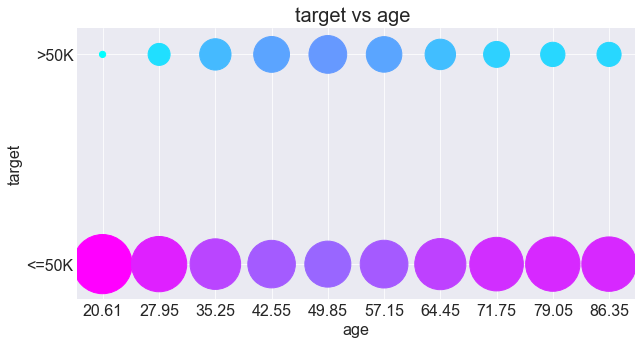

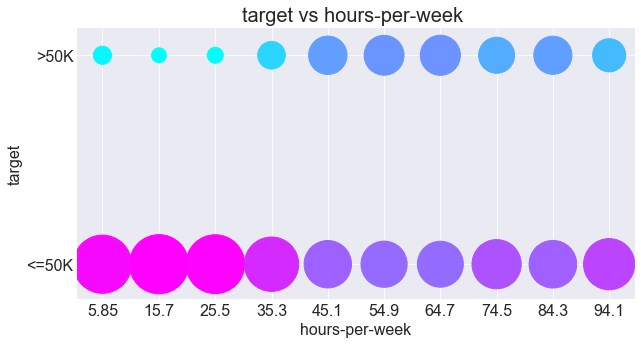

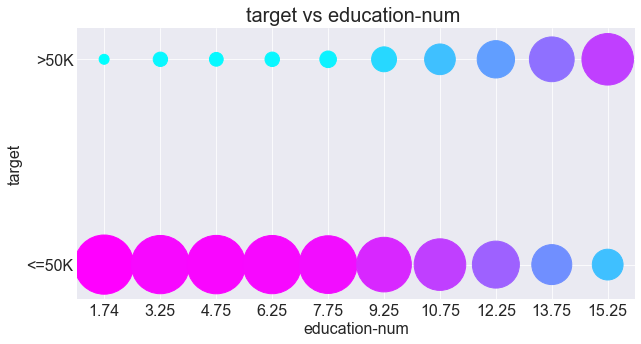

In [14]:
%matplotlib inline
bubble_plot(df,'age','target', normalization_by_all=False)
bubble_plot(df,'hours-per-week','target', normalization_by_all=False)
bubble_plot(df,'education-num','target', normalization_by_all=False)


# Look at two variables vs the target (the color simbols the target ratio)

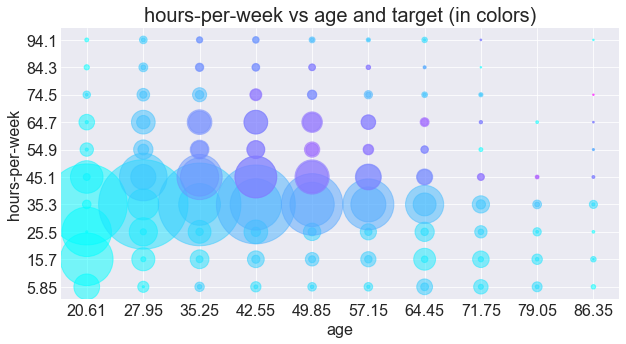

In [15]:
bubble_plot(df, x='age', y='hours-per-week', z_boolean='target', maximal_bubble_size=8000)

# Impute missing values for categorical columns with the most common values

**How to deal with missing values?**

(1) missing at random - imputation - using common values or estimation of the value using regression methods

(2) missing not at random - treat missing value as a separate indicator variable

In [16]:
df = pd.read_csv("adult.csv").drop('Unnamed: 0',axis=1)
categorical_columns = [x for x in df.columns if x not in numerical_columns and x!='target']
for col in categorical_columns:
    df.loc[df[col]==' ?',col] = df[col].value_counts().index.values[0]

# Remove infrequent categorical values

In [17]:
def remove_infrequent_values(df, categorical_columns, frequency_threshold=20):
    infrequent_cols_to_remove = []
    for cat_col in categorical_columns:
        col_count = df[cat_col].value_counts()
        infrequent_values = col_count[col_count<frequency_threshold].index.values
        if not col_count[col_count<20].empty:
            print("removing columns: \n{} \n".format(col_count[col_count<frequency_threshold]))
        infrequent_cols_to_remove += ["{}_{}".format(cat_col, x) for x in infrequent_values]
    return df

df = remove_infrequent_values(df, categorical_columns)

removing columns: 
 Without-pay     14
 Never-worked     7
Name: workclass, dtype: int64 

removing columns: 
 Armed-Forces    9
Name: occupation, dtype: int64 

removing columns: 
 Trinadad&Tobago               19
 Cambodia                      19
 Thailand                      18
 Laos                          18
 Yugoslavia                    16
 Outlying-US(Guam-USVI-etc)    14
 Honduras                      13
 Hungary                       13
 Scotland                      12
 Holand-Netherlands             1
Name: native-country, dtype: int64 



# Convert categorical variables to dummy variables

In [18]:
df = pd.read_csv("adult.csv").drop('Unnamed: 0',axis=1)
y = df.target==">50K"
features = [x for x in df.columns if x!='target']
X = pd.get_dummies(df[features])

In [19]:
X.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ ?,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Split to train and test data - using StratifiedKFold - to keep the target distribution in the data

In [20]:
from sklearn.cross_validation import StratifiedKFold
kf = StratifiedKFold(y, 5, random_state=12345, shuffle=True)
train_index, test_index = list(kf)[0]
train, test = X.iloc[train_index], X.iloc[test_index]
y_train, y_test = y[train_index], y[test_index]


/Users/slador/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
df.target.value_counts()/len(df)

<=50K    0.75919
>50K     0.24081
Name: target, dtype: float64

In [22]:
pd.Series(y_train).value_counts()/len(y_train)

False    0.759214
True     0.240786
Name: target, dtype: float64

In [23]:
pd.Series(y_test).value_counts()/len(y_test)

False    0.759097
True     0.240903
Name: target, dtype: float64

# Check correlation between the variables and between the variables and the target

## Important specifically for Logistic regression where correlation between variables can contribute to a numerically unstable solution 

,var_1,var_2,value
0,age,target,0.234037
1,workclass_ Private,workclass_ Federal-gov,-0.264369
2,education_ 10th,education-num,-0.272428
3,education_ 5th-6th,education-num,-0.279766
4,workclass_ Self-emp-inc,workclass_ Private,-0.285747
5,workclass_ State-gov,workclass_ Private,-0.309064
6,education-num,target,0.335154
7,workclass_ Private,workclass_ ?,-0.370780
8,workclass_ Private,workclass_ Local-gov,-0.397547
9,workclass_ Self-emp-not-inc,workclass_ Private,-0.441289


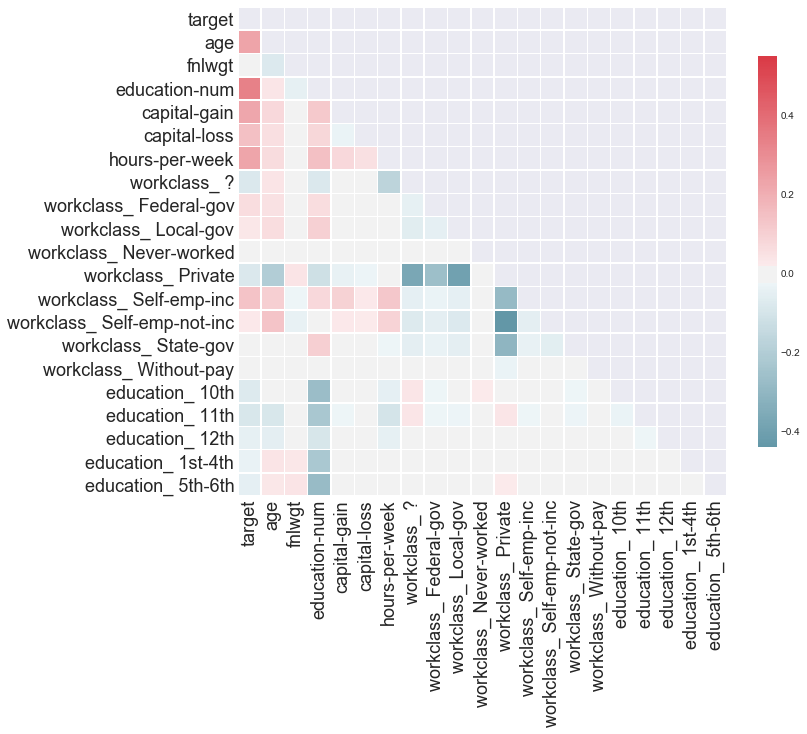

In [24]:
def get_most_correlated_variables(corr, num_pairs=10):
    correlation_melted = pd.melt(corr.reset_index().rename(columns={"index": "var_1"}), id_vars=("var_1"),var_name='var_2')
    correlation_melted = correlation_melted[correlation_melted.var_1!=correlation_melted.var_2]
    correlation_melted['var_couple'] = correlation_melted[['var_1','var_2']].apply(lambda x:tuple(sorted([x[0],x[1]])), axis=1)
    correlation_melted = correlation_melted.drop_duplicates(subset='var_couple').drop(['var_couple'],axis=1)
    correlation_melted['abs_value'] = correlation_melted['value'].abs().round(3)
    return correlation_melted.sort_values(by='abs_value').tail(num_pairs).drop('abs_value', axis=1).reset_index(drop=True)

def plot_correlation_matrix(X, features2):
    corr = X[features2].corr()
     # return the most correlated variables
    most_correlated_variables = get_most_correlated_variables(corr, num_pairs=10)
    max_correlation = 1.25*most_correlated_variables['value'].abs().max()
    # Generate a mask for the upper triangle
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True
    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=(11, 9))
    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)
    ax.set_yticklabels(features2, fontsize=18)
    ax.set_xticklabels(features2, rotation='vertical', fontsize=18)
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, vmax=max_correlation, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .8})
    return most_correlated_variables
if 'target' not in X:
    X['target'] = y
features2 = ['target'] + X.columns[:20].tolist()
plot_correlation_matrix(X, features2)

,var_1,var_2,value
0,education_ Doctorate,education-num,0.260786
1,education_ 10th,education-num,-0.272428
2,education_ 5th-6th,education-num,-0.279766
3,education_ HS-grad,education-num,-0.289817
4,education_ HS-grad,education_ Bachelors,-0.306098
5,education-num,target,0.335154
6,education_ 7th-8th,education-num,-0.336268
7,education_ Masters,education-num,0.360101
8,education_ Some-college,education_ HS-grad,-0.370598
9,education_ Bachelors,education-num,0.503435


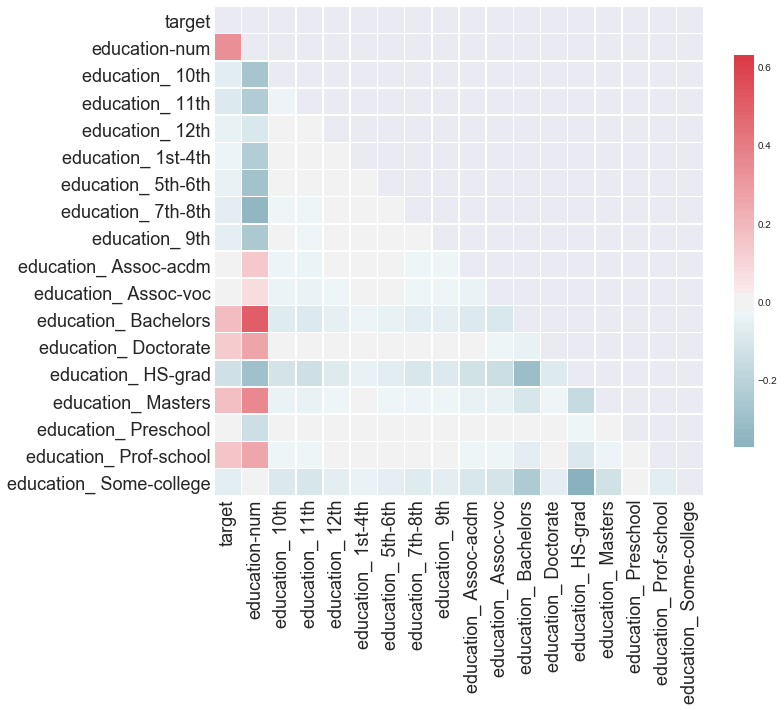

In [25]:
features2 =['target']+[x for x in X.columns if x.startswith('education') ]
plot_correlation_matrix(X, features2)

,var_1,var_2,value
0,marital-status_ Married-civ-spouse,marital-status_ Divorced,-0.366837
1,relationship_ Own-child,marital-status_ Married-civ-spouse,-0.380070
2,relationship_ Husband,target,0.401035
3,marital-status_ Married-civ-spouse,target,0.444696
4,relationship_ Not-in-family,relationship_ Husband,-0.482936
5,relationship_ Own-child,marital-status_ Never-married,0.509226
6,relationship_ Not-in-family,marital-status_ Married-civ-spouse,-0.537588
7,relationship_ Husband,marital-status_ Never-married,-0.576730
8,marital-status_ Never-married,marital-status_ Married-civ-spouse,-0.644866
9,relationship_ Husband,marital-status_ Married-civ-spouse,0.893210


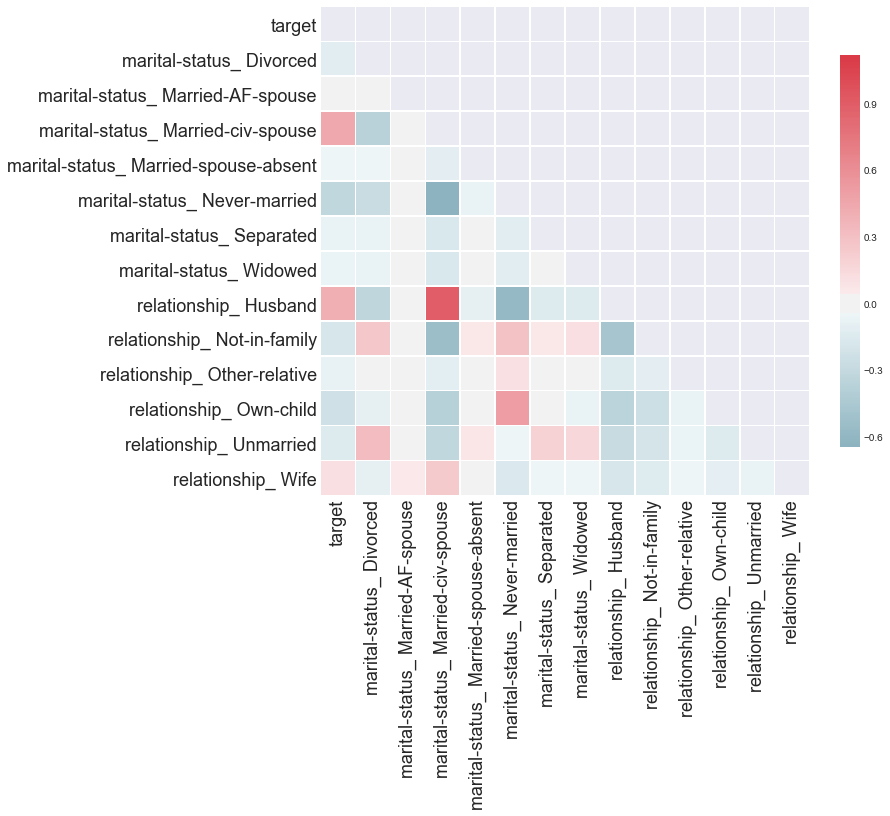

In [26]:
features2 =['target']+[x for x in X.columns if x.startswith('relationship_') or x.startswith('marital')]
plot_correlation_matrix(X, features2)

# Find features which are highly correlated to each other

In [27]:
if 'target' in X:
    X = X.drop('target', axis=1)
corr = X.corr()
most_correlated_variables = get_most_correlated_variables(corr, num_pairs=10)

In [28]:
most_correlated_variables

,var_1,var_2,value
0,marital-status_ Never-married,age,-0.534359
1,relationship_ Not-in-family,marital-status_ Married-civ-spouse,-0.537588
2,relationship_ Husband,marital-status_ Never-married,-0.576730
3,sex_ Female,relationship_ Husband,-0.580135
4,sex_ Male,relationship_ Husband,0.580135
5,marital-status_ Never-married,marital-status_ Married-civ-spouse,-0.644866
6,race_ White,race_ Black,-0.788747
7,relationship_ Husband,marital-status_ Married-civ-spouse,0.893210
8,occupation_ ?,workclass_ ?,0.997985
9,sex_ Male,sex_ Female,-1.000000


In [29]:
most_correlated_variables.tail(5).var_2.values

array(['marital-status_ Married-civ-spouse', 'race_ Black',
       'marital-status_ Married-civ-spouse', 'workclass_ ?', 'sex_ Female'], dtype=object)

# Find features which are highly correlated with the target

In [30]:
if 'target' not in X:
    X['target'] = y
corr = X.corr()
corr_with_target = corr[['target']].drop('target', axis=0)
corr_with_target['abs_value'] = corr_with_target.abs()
corr_with_target.sort_values(by='abs_value').tail(10).drop('abs_value',axis=1)

,target
sex_ Male,0.215980
sex_ Female,-0.215980
capital-gain,0.223329
relationship_ Own-child,-0.228532
hours-per-week,0.229689
age,0.234037
marital-status_ Never-married,-0.318440
education-num,0.335154
relationship_ Husband,0.401035
marital-status_ Married-civ-spouse,0.444696


In [31]:
best_features_by_correlation = corr_with_target[corr_with_target.abs_value>0.05].index.values

In [32]:
len(best_features_by_correlation)

43

# Dimension reduction with PCA 
Data is projected into a new space where the new transformed features has no mutual correlation.

In [33]:
from sklearn.decomposition import PCA
pca = PCA(n_components=train.shape[1])
train_pca = pca.fit_transform(train, )
test_pca = pca.transform(test)


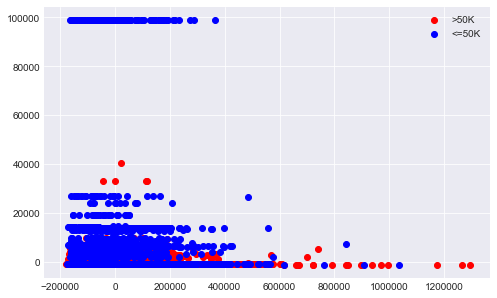

In [34]:
plt.figure(figsize=(8,5))
plt.scatter(train_pca[(y_train==0).values,0], train_pca[(y_train==0).values,1], color='r', label='>50K')
plt.scatter(train_pca[(y_train==1).values,0], train_pca[(y_train==1).values,1], color='b', label='<=50K')
plt.legend()

# Plot the Explained variance in each component

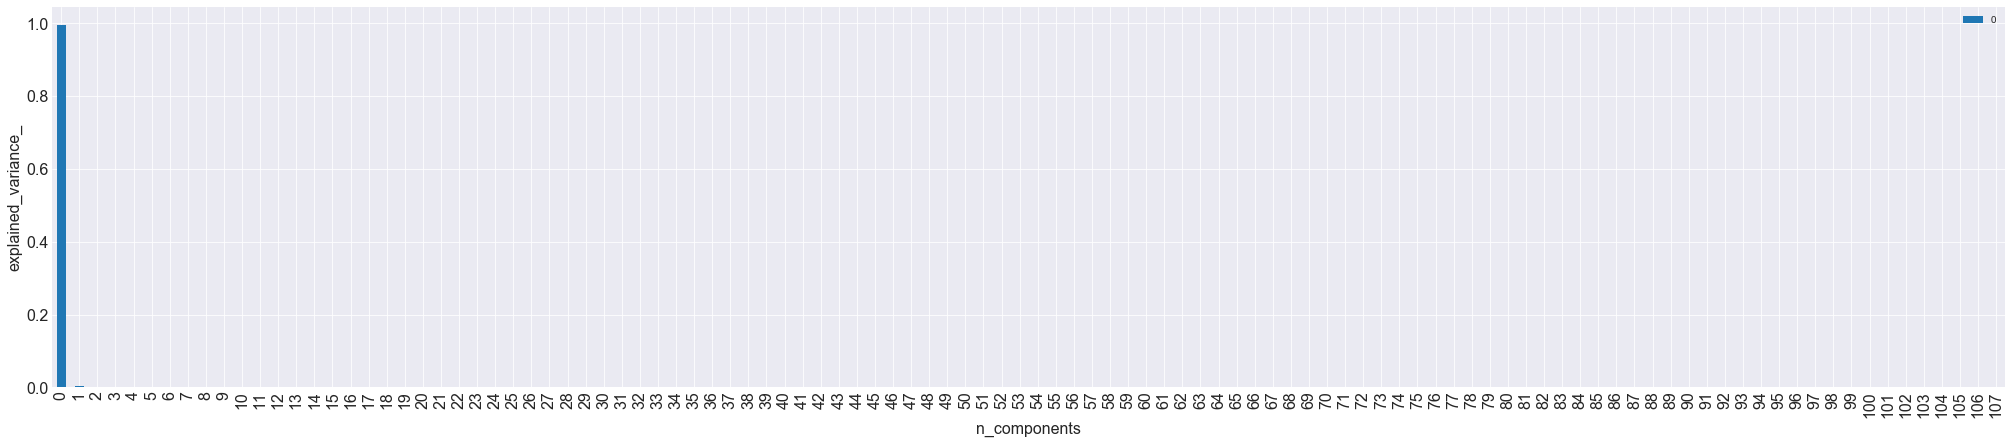

In [35]:
plt.figure(figsize=(30,5))
pd.DataFrame(pca.explained_variance_ratio_).plot.bar(log=False, figsize=(35,7), fontsize=16)
plt.xlabel('n_components',fontsize=16)
plt.ylabel('explained_variance_', fontsize=16);

/Users/slador/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:3245: UserWarning: Attempted to set non-positive ylimits for log-scale axis; invalid limits will be ignored.
  'Attempted to set non-positive ylimits for log-scale axis; '


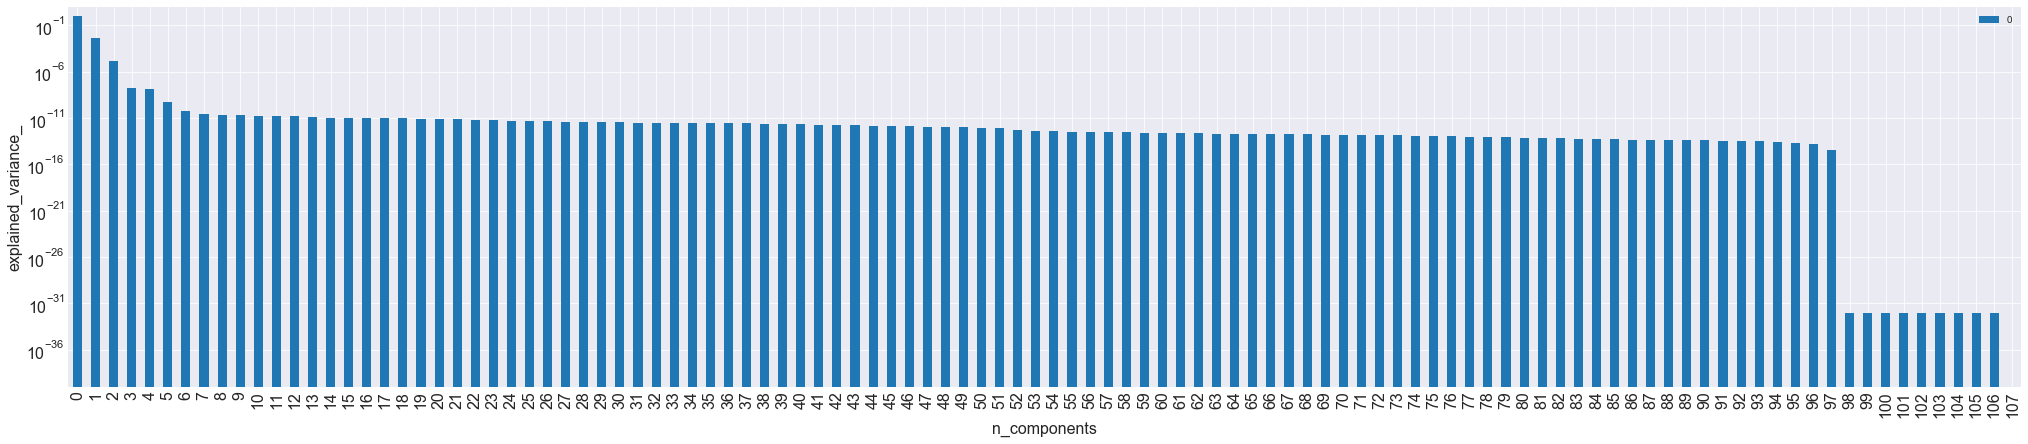

In [36]:
plt.figure(figsize=(30,5))
pd.DataFrame(pca.explained_variance_ratio_).plot.bar(log=True, figsize=(35,7), fontsize=16)
plt.xlabel('n_components',fontsize=16)
plt.ylabel('explained_variance_', fontsize=16);
plt.ylim([0,10]);

# Train a Logistic regression model and evaluate its results

             precision    recall  f1-score   support

      False       0.79      0.60      0.69      4944
       True       0.29      0.50      0.37      1569

avg / total       0.67      0.58      0.61      6513



/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


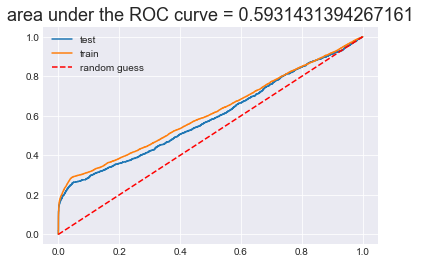

In [37]:
%matplotlib inline
import seaborn as sns
from sklearn.metrics import roc_auc_score, classification_report, roc_curve, confusion_matrix
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion, make_pipeline

def find_best_threshold(thresholds, fpr, tpr):
    """
    find the best threshold from the roc curve. by finding the threshold for the point which is closest to (fpr=0,tpr=1)
    """
    fpr_tpr = pd.DataFrame({'thresholds': thresholds, 'fpr': fpr, 'tpr': tpr})
    fpr_tpr['dist'] = (fpr_tpr['fpr'])**2 + (fpr_tpr['tpr']-1)**2
    return fpr_tpr.ix[fpr_tpr.dist.idxmin(), 'thresholds']


def get_model_results(model, train, test, y_train, y_test):
    probabilities = model.predict_proba(test)[:,1]
    fpr, tpr, thresholds = roc_curve(y_test, probabilities)
    threshold = find_best_threshold(thresholds, fpr, tpr)
    predictions = probabilities>threshold
    plt.figure()
    plt.plot(fpr, tpr, label='test')
    roc_auc = roc_auc_score(y_test, probabilities)
    probabilities = model.predict_proba(train)[:,1]
    fpr, tpr, thresholds = roc_curve(y_train, probabilities)
    plt.plot(fpr, tpr, label='train')
    plt.plot([0, 1], [0, 1], 'r--', label='random guess')
    plt.title("area under the ROC curve = {}".format(roc_auc), fontsize=18);
    print(classification_report(y_test, predictions))
    plt.legend()

model = make_pipeline(LogisticRegression())
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# Logistic regression with normalization

             precision    recall  f1-score   support

      False       0.94      0.81      0.87      4944
       True       0.59      0.84      0.69      1569

avg / total       0.85      0.82      0.83      6513



/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


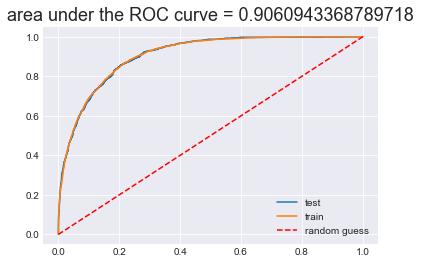

In [38]:
model = make_pipeline(MinMaxScaler(),LogisticRegression())
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

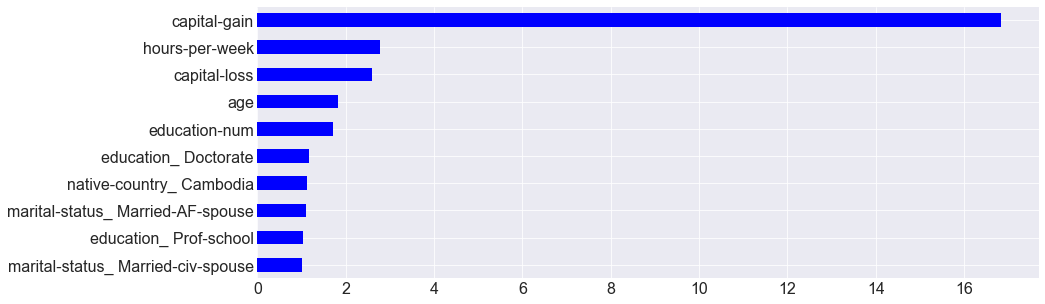

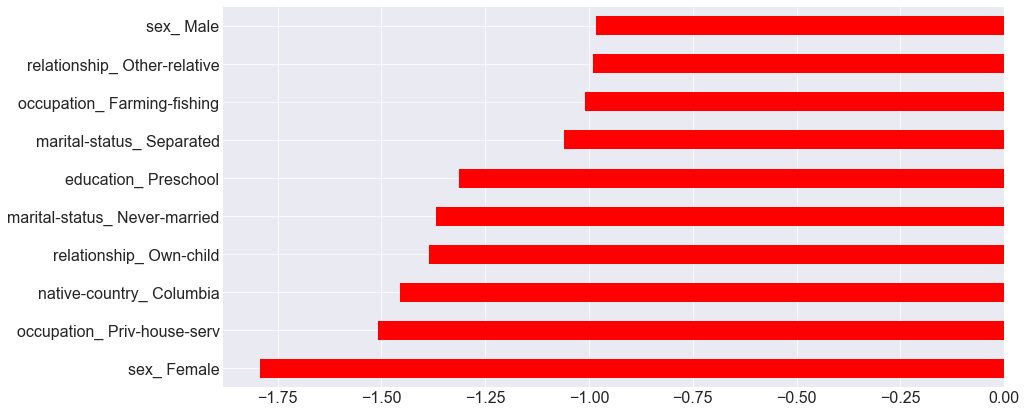

In [39]:
feature_importance = pd.Series(index=train.columns , data= model.named_steps['logisticregression'].coef_[0])
feature_importance = feature_importance.sort_values()
plt.figure(figsize=(14,5))
feature_importance.tail(10).plot.barh(fontsize=16,color='b' )
plt.figure(figsize=(14,5))
feature_importance.head(10).plot.barh(fontsize=16, figsize=(14,7), color='r')

# Logistic regression with PCA

             precision    recall  f1-score   support

      False       0.95      0.79      0.86      4944
       True       0.57      0.86      0.68      1569

avg / total       0.85      0.81      0.82      6513



/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


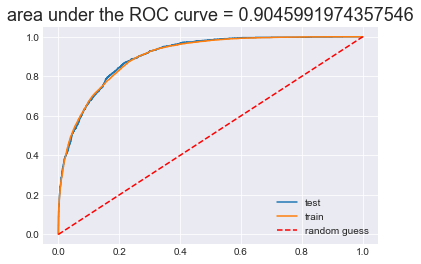

In [40]:
model = make_pipeline(PCA(n_components=30,whiten=False),LogisticRegression())
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# Logistic regression with Polynomial features

In [ ]:
model = make_pipeline(PolynomialFeatures(),MinMaxScaler(), LogisticRegression())
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# Logistic regression with Polynomial features only for the numerical features

In [41]:
poly = PolynomialFeatures(2)
train_poly_features = poly.fit_transform(train[numerical_columns])
test_poly_features = poly.transform(test[numerical_columns])
train_with_poly_features = pd.concat([train.reset_index(drop=True),pd.DataFrame(train_poly_features)],axis=1)
test_with_poly_features = pd.concat([test.reset_index(drop=True),pd.DataFrame(test_poly_features)],axis=1)

             precision    recall  f1-score   support

      False       0.94      0.82      0.87      4944
       True       0.59      0.84      0.70      1569

avg / total       0.86      0.82      0.83      6513



/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


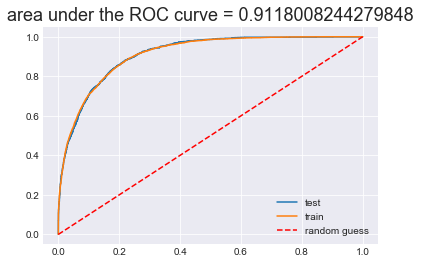

In [42]:
model = make_pipeline(MinMaxScaler(),LogisticRegression())
model.fit(train_with_poly_features, y_train)
get_model_results(model, train_with_poly_features, test_with_poly_features, y_train, y_test)

# Try at home: Explore the logistic regression coefficients

In [46]:
model.coef_[0]

AttributeError: 'DecisionTreeClassifier' object has no attribute 'coef_'

# Hyper-parameter tuning for logistic regression

/Users/slador/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


             precision    recall  f1-score   support

      False       0.94      0.81      0.87      4944
       True       0.59      0.84      0.69      1569

avg / total       0.86      0.82      0.83      6513

{'logisticregression__C': 1, 'logisticregression__penalty': 'l1'}


/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


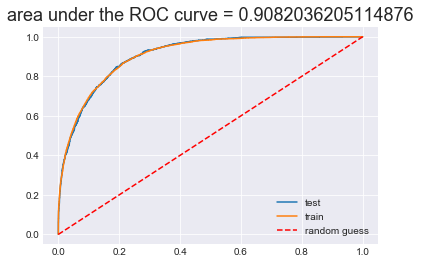

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.grid_search import GridSearchCV
params = {#'logisticregression__penalty': ['l2','l1'], 'logisticregression__C': [1, 10, 100, 1000],
          'logisticregression__penalty': ['l1'], 'logisticregression__C': [1,],
#                  'solver': ['newton-cg'],
#                  'logisticregression__fit_intercept': [False, True]
         }
gscv = GridSearchCV(make_pipeline(MinMaxScaler(), LogisticRegression()), params, scoring='roc_auc', cv=3)
gscv.fit(train, y_train)
get_model_results(gscv, train, test, y_train, y_test)
print(gscv.best_params_)

# Decision tree classifier

             precision    recall  f1-score   support

      False       0.76      1.00      0.86      4944
       True       0.00      0.00      0.00      1569

avg / total       0.58      0.76      0.66      6513



/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()
/Users/slador/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


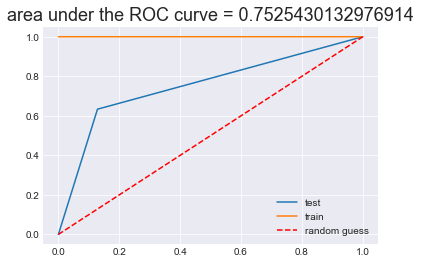

In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier() 
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# min_samples_split=10 to reduce overfitting

             precision    recall  f1-score   support

      False       0.91      0.80      0.85      4944
       True       0.55      0.76      0.64      1569

avg / total       0.82      0.79      0.80      6513



/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


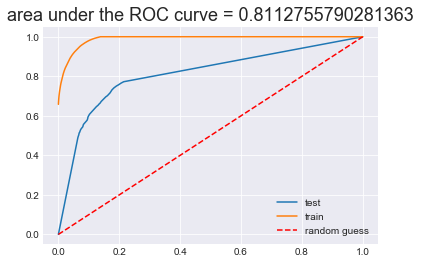

In [47]:
model = DecisionTreeClassifier(min_samples_split=10) 
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# min_samples_split=50 to reduce overfitting

             precision    recall  f1-score   support

      False       0.93      0.79      0.86      4944
       True       0.55      0.82      0.66      1569

avg / total       0.84      0.80      0.81      6513



/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


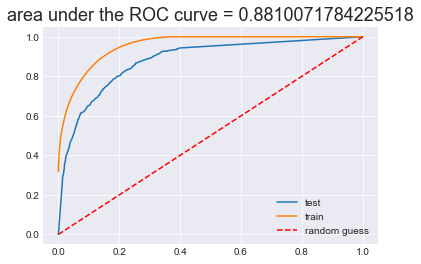

In [48]:
model = DecisionTreeClassifier(min_samples_split=50) 
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# Random forest classifier

/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


             precision    recall  f1-score   support

      False       0.93      0.80      0.86      4944
       True       0.56      0.81      0.66      1569

avg / total       0.84      0.80      0.81      6513



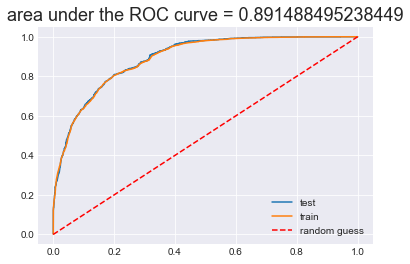

In [49]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=3, n_estimators=100) # max_depth=4
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# plot one of the random forest trees

In [50]:
from sklearn import tree
from os import system

tree_dot_path = "models/tree1.dot"
tree_png_path = "models/tree1.png"
dotfile = open(tree_dot_path, 'w')
tree.export_graphviz(model.estimators_[10], out_file = dotfile, 
                     feature_names = train.columns, 
                     filled=True)
dotfile.close()
system("dot -Tpng {tree_dot_path} -o {tree_png_path}".format(
        tree_dot_path=tree_dot_path, tree_png_path=tree_png_path));

<img src=models/tree1.png width="1700">

# XGBoost - Extreme gradient boosted trees
https://github.com/dmlc/xgboost

/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


             precision    recall  f1-score   support

      False       0.95      0.82      0.88      4944
       True       0.60      0.86      0.71      1569

avg / total       0.86      0.83      0.84      6513



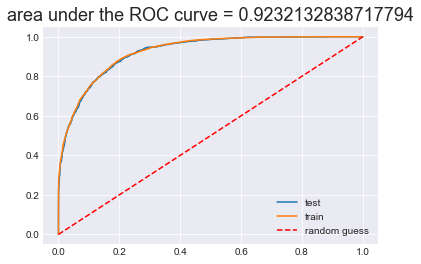

In [51]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# Feature importnace for xgboost

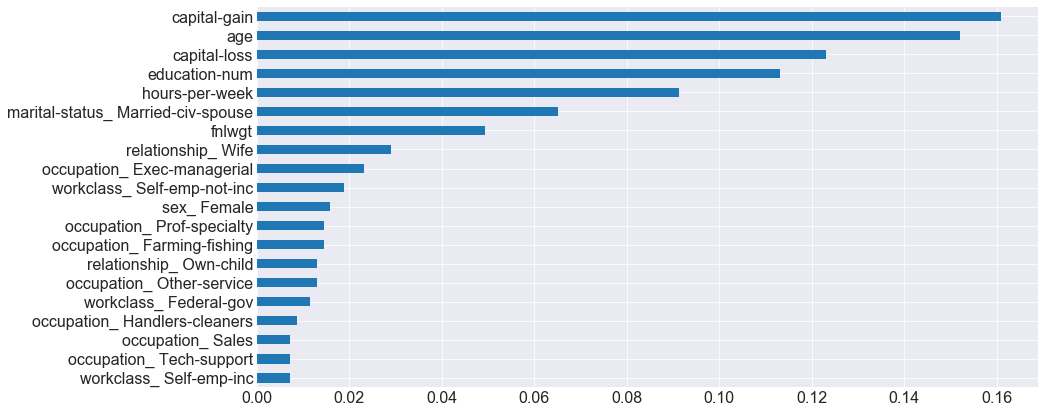

In [52]:
import xgboost as xgb
feature_importance = pd.Series(index=train.columns , data= model.feature_importances_)
feature_importance = feature_importance.sort_values()
feature_importance.tail(20).plot.barh(fontsize=16, figsize=(14,7))

# XGBoost with polynomial features

/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


             precision    recall  f1-score   support

      False       0.95      0.83      0.88      4944
       True       0.61      0.85      0.71      1569

avg / total       0.87      0.83      0.84      6513



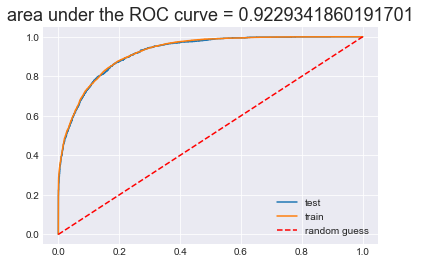

In [53]:
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train_with_poly_features, y_train)
get_model_results(model, train_with_poly_features, test_with_poly_features, y_train, y_test)

# XGBoost classifier with the 15 strongest features

             precision    recall  f1-score   support

      False       0.95      0.83      0.88      4944
       True       0.61      0.85      0.71      1569

avg / total       0.87      0.84      0.84      6513



/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


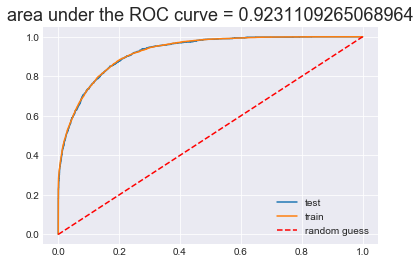

In [54]:
best_features = feature_importance.tail(15).index.values
from xgboost import XGBClassifier
model = XGBClassifier()
model.fit(train[best_features].rename(columns={x:x.replace(" ","") for x in best_features}), y_train)

get_model_results(model, train[best_features].rename(columns={x:x.replace(" ","") for x in best_features}),  test[best_features].rename(columns={x:x.replace(" ","") for x in best_features}), y_train, y_test)

# plot one of the xgboost trees

ImportError: You must install graphviz to plot tree

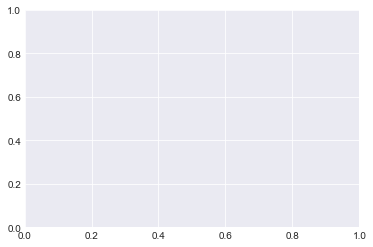

In [55]:
import matplotlib
from xgboost import plot_tree
from matplotlib.pylab import rcParams
ax = plot_tree(model,num_trees=10, rankdir='LR')
fig = ax.figure
fig.set_size_inches(20, 20)


# Visualization of the data with TSNE

In [ ]:
%%time
from sklearn.manifold import TSNE
tsne = TSNE() #n_iter=200)
# train_transformed = tsne.fit_transform(train[best_features])
# pd.DataFrame(train_transformed).to_pickle("train_transformed.pkl")
train_transformed = pd.read_pickle("train_transformed.pkl").values
plt.scatter(train_transformed[(y_train==0).values,0], train_transformed[(y_train==0).values,1], color='r', label='class 1')
plt.scatter(train_transformed[(y_train==1).values,0], train_transformed[(y_train==1).values,1], color='b', label='class 2')
plt.legend()

# Bonus: try encoding the variables based on conditional distribution P(y=1 / x=xi)

In [64]:
def encode_column_by_frequency(train, test, col, log=True):
    country_by_target = train.groupby(col)['target'].value_counts().unstack().fillna(0)
    if log:
        country_probability = np.log((country_by_target['>50K']+1e-5)/(country_by_target.sum(axis=1)+1e-5))
    else:
        country_probability = (country_by_target['>50K']+1e-5)/(country_by_target.sum(axis=1)+1e-5)
    for val in test[col].unique():    
        if val in country_probability.index.values: 
            continue
        country_probability[val] = country_probability.median()
    train[col] = train[col].map(country_probability)
    test[col] = test[col].map(country_probability)
    return train, test

def encode_numeric_column_by_frequency(train, test, col, log=True, plot_flag=False, window_size=3):
    country_by_target = train.groupby(col)['target'].value_counts().unstack().fillna(0)
    if log:
        country_probability = np.log((country_by_target['>50K']+1e-5)/(country_by_target.sum(axis=1)+1e-5))
    else:
        country_probability = (country_by_target['>50K']+1e-5)/(country_by_target.sum(axis=1)+1e-5)
    values = np.unique(train[col].unique().tolist()+test[col].unique().tolist())
    resolution = min(1,np.min(np.diff(values)))
    start = np.min(country_probability.index.unique().tolist())
    end = np.max(country_probability.index.unique().tolist())
    country_probability = pd.merge(pd.DataFrame(country_probability),
                                   pd.DataFrame(index=np.arange(start, end+resolution, resolution)),
                                   left_index=True, right_index=True, how='outer').interpolate(method='linear')
    if plot_flag:
        plt.figure()
        country_probability[0].plot(marker='o')
    country_probability=((country_probability[0].cumsum() - country_probability[0].shift(window_size).cumsum())/window_size).shift(-1).fillna(0)
    if plot_flag:
        country_probability.plot()
        plt.title(col)
    train[col] = train[col].map(country_probability)
    test[col] = test[col].map(country_probability)
    return train, test

In [65]:
def get_data_with_encoded_fetures(plot_flag=False):
    df = pd.read_csv("adult.csv").drop('Unnamed: 0',axis=1)#.drop('fnlwgt', axis=1)
    categorical_columns = [x for x in df.columns if x not in numerical_columns and x!='target']
    columns_to_encode_with_frequencies=categorical_columns
    for col in categorical_columns:
        df.loc[df[col]==' ?',col] = df[col].value_counts().index.values[0]
    features = [x for x in df if x != 'target']
    X = df[features]
    y = df.target==">50K"
    kf = StratifiedKFold(y, 5, random_state=12345, shuffle=True)
    train_index, test_index = list(kf)[0]
    train, test = df.iloc[train_index], df.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    for col in categorical_columns:
        train, test = encode_column_by_frequency(train, test, col, log=False)
    for col in numerical_columns: 
        if col=='fnlwgt': continue
        train, test = encode_numeric_column_by_frequency(train, test, col,log=False, plot_flag=plot_flag)
    train=train.drop('target',axis=1)
    test=test.drop('target',axis=1)
    return train, test, y_train, y_test

# Logistic regression with features replaced with conditional probabilities

/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value in

             precision    recall  f1-score   support

      False       0.94      0.83      0.88      4944
       True       0.61      0.84      0.71      1569

avg / total       0.86      0.83      0.84      6513



/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


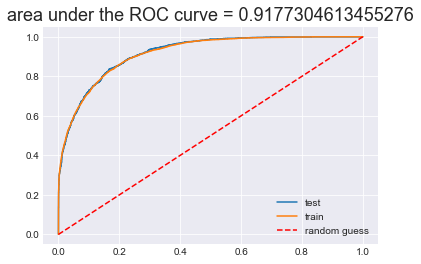

In [66]:
train, test, y_train, y_test = get_data_with_encoded_fetures(plot_flag=False)
model = make_pipeline(MinMaxScaler(),LogisticRegression())
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test )


# Logistic regression with features replaced with conditional probabilities + Polynomial features


             precision    recall  f1-score   support

      False       0.95      0.83      0.89      4944
       True       0.62      0.85      0.72      1569

avg / total       0.87      0.84      0.85      6513



/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


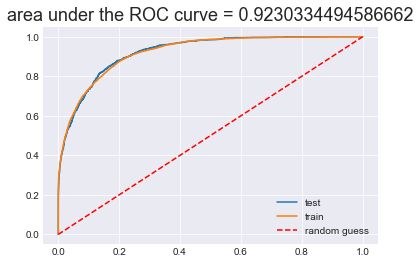

In [67]:
model = make_pipeline(PolynomialFeatures(), MinMaxScaler(),LogisticRegression())
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)


# XGBOOST  with features replaced with conditional probabilities


             precision    recall  f1-score   support

      False       0.95      0.83      0.89      4944
       True       0.62      0.87      0.72      1569

avg / total       0.87      0.84      0.85      6513



/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


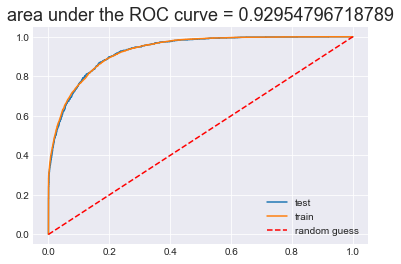

In [68]:
model = XGBClassifier()
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# XGBOOST with features replaced with conditional probabilities + Polynomial features


/Users/slador/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  app.launch_new_instance()


             precision    recall  f1-score   support

      False       0.95      0.83      0.89      4944
       True       0.62      0.86      0.72      1569

avg / total       0.87      0.84      0.85      6513



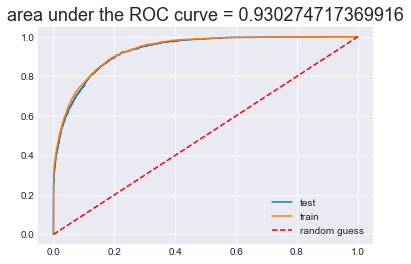

In [69]:
model = make_pipeline(PolynomialFeatures(), XGBClassifier())
model.fit(train, y_train)
get_model_results(model, train, test, y_train, y_test)

# What's next?
- Undetstand which further cool features are missing - use different transformations on the features, use combinations of features, find more data sources which could help to the problem...
- Analyze your model errors and feature importance
- Use tools like LIME to understand your model decisions and errors
- Further tuning of the model - model selection, ensembling and stacking models, hyper-parameters tuning
- Present the results in a clear way according to the relevant business metrics


# Questions?

<img src='meme1.jpg' width="300">

For additional questions - your'e welcome to stay in touch - meir.shir86@gmail.com